# 1. Import dataset and split into Attributes and Target

In [1]:
#Lib
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the input dataset
df = pd.read_csv('dataset-1100.csv')
df.head(10)

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC,Cost_[E/MWh],Congestion_[h],PeakLoad_[MW],MaxCurtailment_[MW],...,CurtailmentToRESGeneration_[%],TotalGeneration_[TWh],ShareResGeneration_[%],MaxLoadSheddingShare_[%],CF_gas,CF_nuc,CF_wat,CF_win,CF_sun,GAMS_error
0,1.098593,0.540393,0.460149,0.535035,0.343107,0.544615,88.072573,293839.0,440929.412497,0.550312,...,29.963919,3047.316869,0.000079,0.0,0.036030,0.484077,0.273168,0.146850,0.107152,1
1,0.782451,0.566353,1.774985,0.374750,0.094936,0.249031,96.630294,326867.0,440929.412497,0.242774,...,15.977487,2976.149187,0.000044,0.0,0.286937,0.876967,0.252869,0.190090,0.131107,1
2,0.531917,0.730365,0.806288,0.351632,0.230776,0.001928,4538.626398,411201.0,440929.412497,0.354442,...,21.971390,2979.119265,0.000055,0.0,0.481446,0.903957,0.243723,0.163668,0.119675,0
3,1.110630,0.399040,1.808700,0.405169,0.126999,0.188338,89.027173,335214.0,440929.412497,0.293748,...,21.206664,2984.176342,0.000049,0.0,0.102610,0.567768,0.246053,0.170835,0.128403,1
4,0.942258,0.284838,2.262004,0.490838,0.152132,0.398744,89.057363,298799.0,440929.412497,0.391203,...,22.902749,3012.336206,0.000058,0.0,0.072075,0.550861,0.258553,0.165769,0.129211,1
5,1.296488,0.459046,0.900532,0.052915,0.103549,0.245833,88.212089,308770.0,440929.412497,0.005486,...,0.226146,2927.969834,0.000019,0.0,0.113881,0.845544,0.258085,0.242043,0.133870,1
6,1.188883,0.745253,0.371677,0.011308,0.010148,0.154239,93.375235,317457.0,440929.412497,0.000029,...,0.012267,2879.947167,0.000006,0.0,0.388916,0.994705,0.249543,0.244239,0.123710,1
7,0.779366,0.668732,0.792359,0.298207,0.343878,0.111319,95.977997,366879.0,440929.412497,0.413393,...,22.116913,3097.056825,0.000059,0.0,0.235589,0.781916,0.249746,0.172844,0.108693,0
8,1.164224,0.522242,2.009267,0.315763,0.058904,0.254564,91.158939,322671.0,440929.412497,0.178995,...,12.610138,2951.676798,0.000036,0.0,0.128719,0.772830,0.254944,0.202730,0.131380,1
9,1.270987,0.485801,0.987387,0.218390,0.249524,0.465988,86.170630,286215.0,440929.412497,0.233673,...,5.184548,3059.505931,0.000045,0.0,0.035881,0.647670,0.265894,0.222684,0.130247,1


In [2]:
df.columns

Index(['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV',
       'rNTC', 'Cost_[E/MWh]', 'Congestion_[h]', 'PeakLoad_[MW]',
       'MaxCurtailment_[MW]', 'MaxLoadShedding_[MW]', 'Demand_[TWh]',
       'NetImports_[TWh]', 'Curtailment_[TWh]', 'Shedding_[MWh]',
       'LostLoad_[TWh]', 'MaxRESGeneration_[TWh]',
       'CurtailmentToRESGeneration_[%]', 'TotalGeneration_[TWh]',
       'ShareResGeneration_[%]', 'MaxLoadSheddingShare_[%]', 'CF_gas',
       'CF_nuc', 'CF_wat', 'CF_win', 'CF_sun', 'GAMS_error'],
      dtype='object')

In [3]:
df.shape

(1190, 27)

In [4]:
df_filtered = df[df['GAMS_error'] != 2]
df_filtered.shape

(1110, 27)

In [5]:
# Atributes X (features); labels y (target)

Dataset = df_filtered[['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV','rNTC','Curtailment_[TWh]', 'Shedding_[MWh]']]
y_curtail = Dataset['Curtailment_[TWh]']
y_shed = Dataset['Shedding_[MWh]']
X = Dataset[['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV','rNTC']]
X

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC
0,1.098593,0.540393,0.460149,0.535035,0.343107,0.544615
1,0.782451,0.566353,1.774985,0.374750,0.094936,0.249031
2,0.531917,0.730365,0.806288,0.351632,0.230776,0.001928
3,1.110630,0.399040,1.808700,0.405169,0.126999,0.188338
4,0.942258,0.284838,2.262004,0.490838,0.152132,0.398744
...,...,...,...,...,...,...
1183,0.893551,0.816338,0.862697,0.387921,0.198502,0.164167
1184,0.461815,0.631256,2.918347,0.406315,0.078316,0.673934
1185,0.545219,0.689588,1.235586,0.492595,0.021232,0.258091
1186,1.140028,0.881289,2.479692,0.298401,0.061593,0.569228


In [6]:
# Check for missing data in the target
### your code here
nan_values = Dataset.isnull().values.any()
if nan_values:
    print("There are NaN values in the input data.")
else:
    print("There are no NaN values in the input data.")

There are no NaN values in the input data.


In [7]:
# Correlations
correlation_matrix = Dataset.corr()
Corr_curtail = correlation_matrix['Curtailment_[TWh]']
print(Corr_curtail)

CapacityRatio       -0.088237
ShareFlex           -0.038290
ShareStorage        -0.031201
ShareWind            0.814643
SharePV              0.290627
rNTC                -0.198396
Curtailment_[TWh]    1.000000
Shedding_[MWh]       0.135054
Name: Curtailment_[TWh], dtype: float64


In [8]:
Corr_shed = correlation_matrix['Shedding_[MWh]']
print(Corr_shed)

CapacityRatio       -0.412669
ShareFlex            0.013040
ShareStorage        -0.036275
ShareWind            0.119944
SharePV             -0.031244
rNTC                -0.234764
Curtailment_[TWh]    0.135054
Shedding_[MWh]       1.000000
Name: Shedding_[MWh], dtype: float64


# 2. SPLIT & SCALE- Target : Curtailement

In [9]:
print(X.shape)
print(y_curtail.shape)
print(type(X))
print(type(y_curtail))

(1110, 6)
(1110,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [10]:
X.head(3)

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC
0,1.098593,0.540393,0.460149,0.535035,0.343107,0.544615
1,0.782451,0.566353,1.774985,0.374750,0.094936,0.249031
2,0.531917,0.730365,0.806288,0.351632,0.230776,0.001928


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.copy()))
X_scaled.head(3)

,0,1,2,3,4,5
0,0.775383,0.445508,0.153269,0.974380,0.980632,0.728845
1,0.422235,0.485562,0.591652,0.682109,0.270949,0.333088
2,0.142374,0.738613,0.268676,0.639954,0.659403,0.002242


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler_y_cu = MinMaxScaler()
ydf = pd.DataFrame(y_curtail.copy())
y_curtail_scaled = pd.DataFrame(scaler_y_cu.fit_transform(ydf))
y_curtail_scaled.head()

,0
0,0.831044
1,0.238720
2,0.414270
3,0.357642
4,0.460232


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_curtail_train, y_curtail_test = train_test_split(X_scaled, y_curtail_scaled, test_size=0.3,random_state=42)

X_train, X_val, y_curtail_train, y_curtail_val = train_test_split(X_train, y_curtail_train, test_size=0.2,
                                                    shuffle=False)

print("Taille de l'ensemble d'entraînement :", len(X_train))
print("Taille de l'ensemble de validation   :", len(X_val))
print("Taille de l'ensemble de test         :", len(X_test))

Taille de l'ensemble d'entraînement : 621
Taille de l'ensemble de validation   : 156
Taille de l'ensemble de test         : 333


# 3. Model Building - CURTAILEMENT

In [14]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

num_folds = 10
error_metrics = {'neg_mean_absolute_error','neg_root_mean_squared_error'}
models = {('MLP', MLPRegressor()),('RFR', RandomForestRegressor())} #,('SVR', SVR()), ('AdaB', AdaBoostRegressor())}

Evaluation metric:  neg_root_mean_squared_error
Model  RFR


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

Model  MLP


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_p

[('RFR', -0.04312283185014703, 0.00867642218553688), ('MLP', -0.06823488402633118, 0.007114081605514631)]


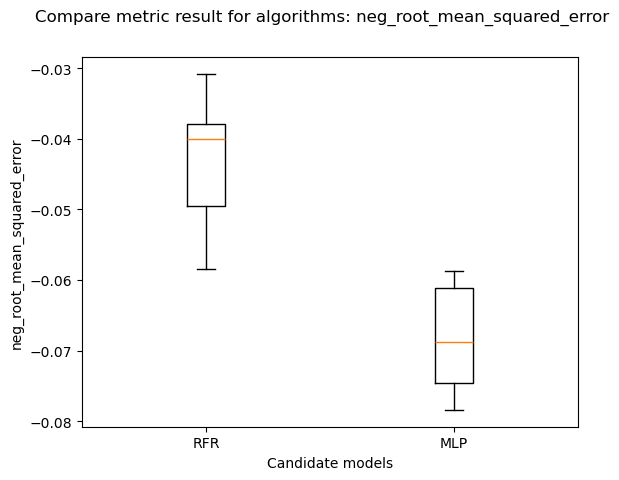

Evaluation metric:  neg_mean_absolute_error
Model  RFR


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

Model  MLP


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_p

[('RFR', -0.028950892281564094, 0.005165903273382738), ('MLP', -0.0530763989793009, 0.007908690691409637)]


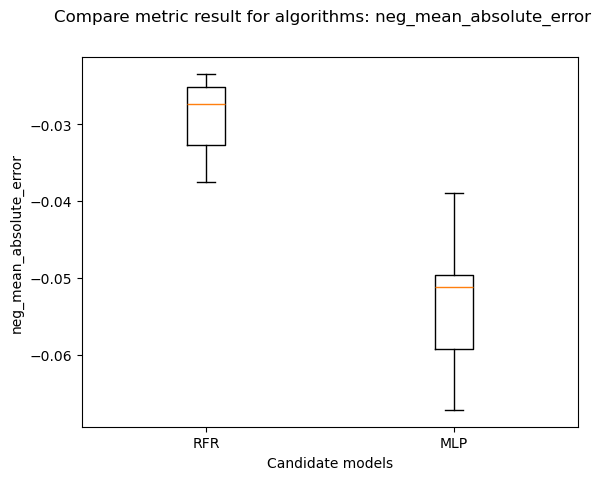

In [15]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# Cross-validation training
for scoring in error_metrics:
    results = [] # store metrics results
    msg = []  # print summary of result
    names = []  # store name of the models
    print('Evaluation metric: ', scoring)
    for name, model in models:
        print('Model ', name)
        cross_validation = KFold(n_splits=num_folds, shuffle=False)
        cv_results = cross_val_score(model, X_train, y_curtail_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Compare results between algorithms
    fig = plt.figure()
    fig.suptitle('Compare metric result for algorithms: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.savefig('MAEComparison')
    plt.show()

    results = []


In [17]:
# RFR seems to be the best regression model : 

modelo = RandomForestRegressor()
scoring='neg_root_mean_squared_error'
params = {
    # Number of trees in random forest
    'n_estimators': [5, 100, 300, 500],  # default=100
     # Maximum number of levels in tree
    'max_depth': [None, 5,10],  #deafult = None
     # The minimum number of samples required to split an internal node
    'min_samples_split': [2, 5, 10],
    # The minimum number of samples required to be at a leaf node
    'min_samples_leaf' : [1, 2, 4],
    # The number of features to consider when looking for the best split
    'max_features' : [None, "sqrt", "log2"],
    # Whether bootstrap samples are used when building trees
    'bootstrap' : [True, False]
}


# Search for the best combination of hyperparameters
cross_validation = KFold(n_splits=5, shuffle=False)
my_cv = cross_validation.split(X_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_curtail_val)

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)

KeyboardInterrupt



In [24]:
#final_model = RandomForestRegressor(**gsearch.best_params_) ## train again with the winner model from the Grid Search
final_model = RandomForestRegressor(bootstrap=True, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500)

C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

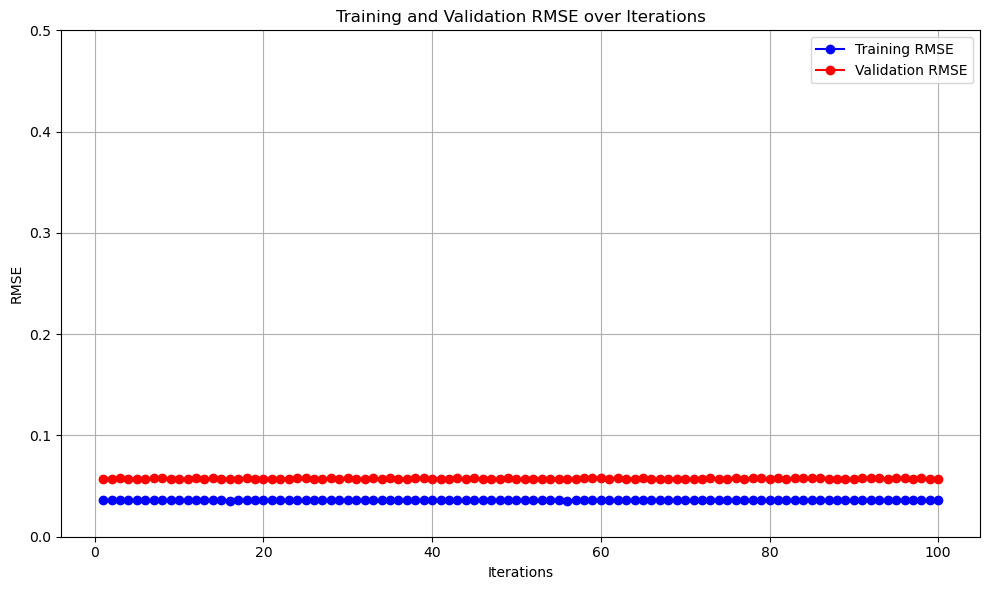

In [25]:
from sklearn.metrics import mean_squared_error

# Nombre d'itérations (époques)
num_iterations = 100

# Listes pour stocker les résultats
train_rmse_list = []
val_rmse_list = []

# Entraîner le modèle pour plusieurs itérations
for i in range(num_iterations):

    final_model.fit(X_train,y_curtail_train)  # Model training 
        
    # Faire des prédictions sur les ensembles d'entraînement et de validation
    y_train_pred_loss = final_model.predict(X_train)
    y_val_pred_loss = final_model.predict(X_val)

    # Calculer l'erreur quadratique moyenne (RMSE) pour chaque ensemble
    rmse_train = np.sqrt(mean_squared_error(y_curtail_train, y_train_pred_loss))
    rmse_val = np.sqrt(mean_squared_error(y_curtail_val, y_val_pred_loss))
    
    # Ajouter les résultats à la liste
    train_rmse_list.append(rmse_train)
    val_rmse_list.append(rmse_val)

# Tracer la performance (RMSE dans cet exemple) sur les époques
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), train_rmse_list, marker='o', linestyle='-', color='b', label='Training RMSE')
plt.plot(range(1, num_iterations + 1), val_rmse_list, marker='o', linestyle='-', color='r', label='Validation RMSE')
plt.title('Training and Validation RMSE over Iterations')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.ylim(0, 0.5)  # Limite les valeurs de l'axe des y entre 0 et 0.5
#plt.xticks(range(1, num_iterations + 1))  # Définit les marques sur l'axe des x pour chaque itération
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
y_predict_curtail = final_model.predict(X_test)  # prediction calculation
len(y_predict_curtail)

333

In [27]:
import math 
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Invert the scaling and plot the results
y_test_unsc = np.reshape(y_curtail_test, (len(y_curtail_test), 1))
y_test_inv = scaler_y_cu.inverse_transform(y_test_unsc)

y_predict_uns = np.reshape(y_predict_curtail, (len(y_predict_curtail), 1))
y_predict_inv = scaler_y_cu.inverse_transform(y_predict_uns)

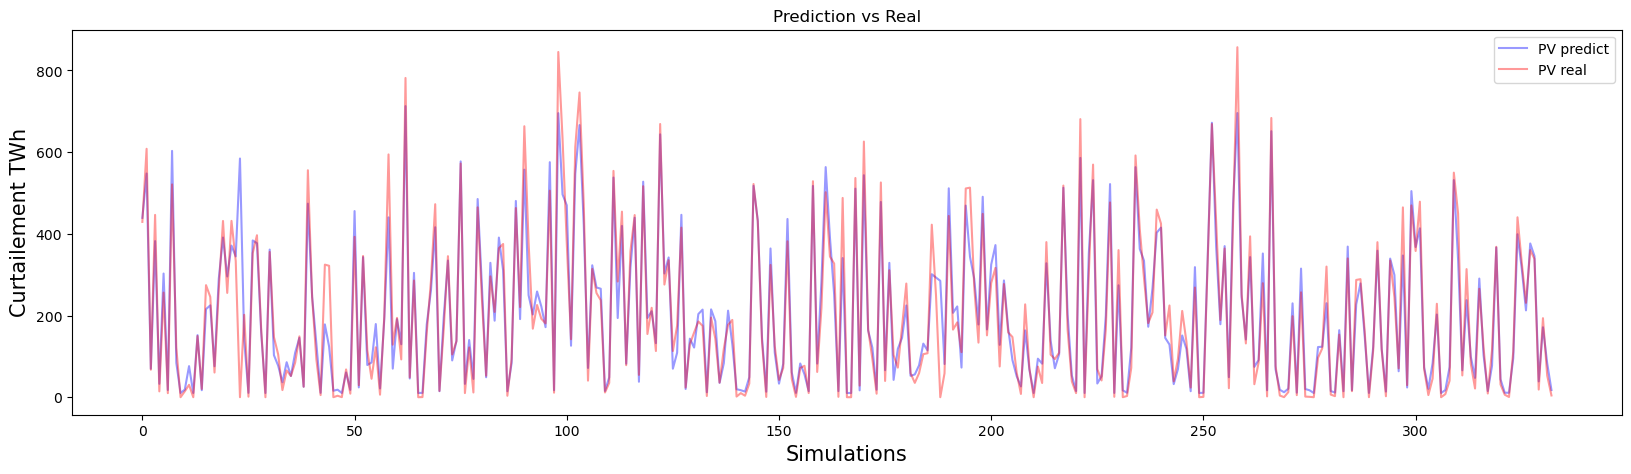

In [28]:
# Plot the prediction on the test datas vs the real data y
x = range(len(y_predict_inv))
plt.figure(figsize=(20,5))
plt.xlabel('Simulations', size=15)
plt.ylabel('Curtailement TWh', size=15)
plt.plot(x, y_predict_inv, alpha=0.4, color='blue', label='PV predict')
plt.plot(x, y_test_inv, alpha=0.4, color='red',  label='PV real')
plt.title('Prediction vs Real')
plt.legend()
#plt.savefig('PredVSReal1.png')
plt.show()


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définir les variables pour lesquelles vous voulez tracer les surfaces
wind_index = 3  # Indice de la première variable d'entrée
pv_index = 4  # Indice de la deuxième variable d'entrée

# Créer une grille de valeurs pour les deux variables d'entrée
x1_values = np.linspace(0, 1, 15)  # Valeurs pour la première variable d'entrée
x2_values = np.linspace(0, 1, 15)  # Valeurs pour la deuxième variable d'entrée
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)

# Préparer les données pour prédiction
static_values = np.full(225, 0.5) #np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])  # Valeurs statiques pour les 4 autres variables
input_data = np.column_stack((static_values, static_values, static_values, x1_mesh.flatten(), x2_mesh.flatten(), static_values))
input_data

array([[0.5       , 0.5       , 0.5       , 0.        , 0.        ,
        0.5       ],
       [0.5       , 0.5       , 0.5       , 0.07142857, 0.        ,
        0.5       ],
       [0.5       , 0.5       , 0.5       , 0.14285714, 0.        ,
        0.5       ],
       ...,
       [0.5       , 0.5       , 0.5       , 0.85714286, 1.        ,
        0.5       ],
       [0.5       , 0.5       , 0.5       , 0.92857143, 1.        ,
        0.5       ],
       [0.5       , 0.5       , 0.5       , 1.        , 1.        ,
        0.5       ]])

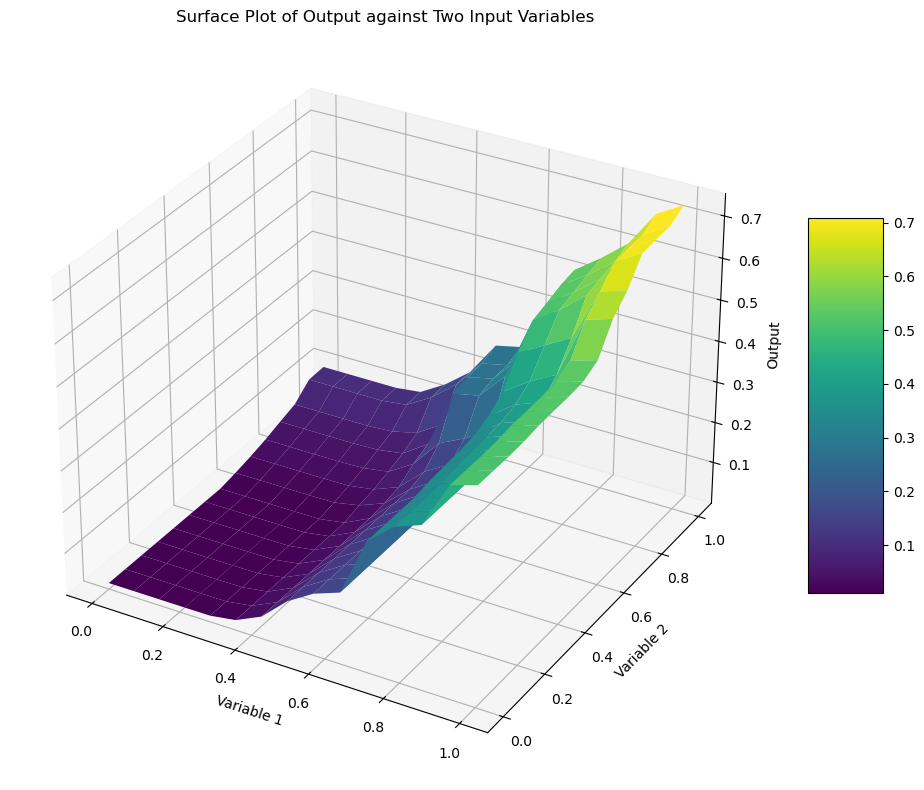

In [34]:
# Prédire avec le modèle entraîné
predictions = final_model.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)

# Tracer la surface en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer la surface prédite
surf = ax.plot_surface(x1_mesh, x2_mesh, predictions_mesh, cmap='viridis', edgecolor='none')
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')
ax.set_zlabel('Output')

# Ajouter une colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.title('Surface Plot of Output against Two Input Variables')
plt.tight_layout()
plt.show()

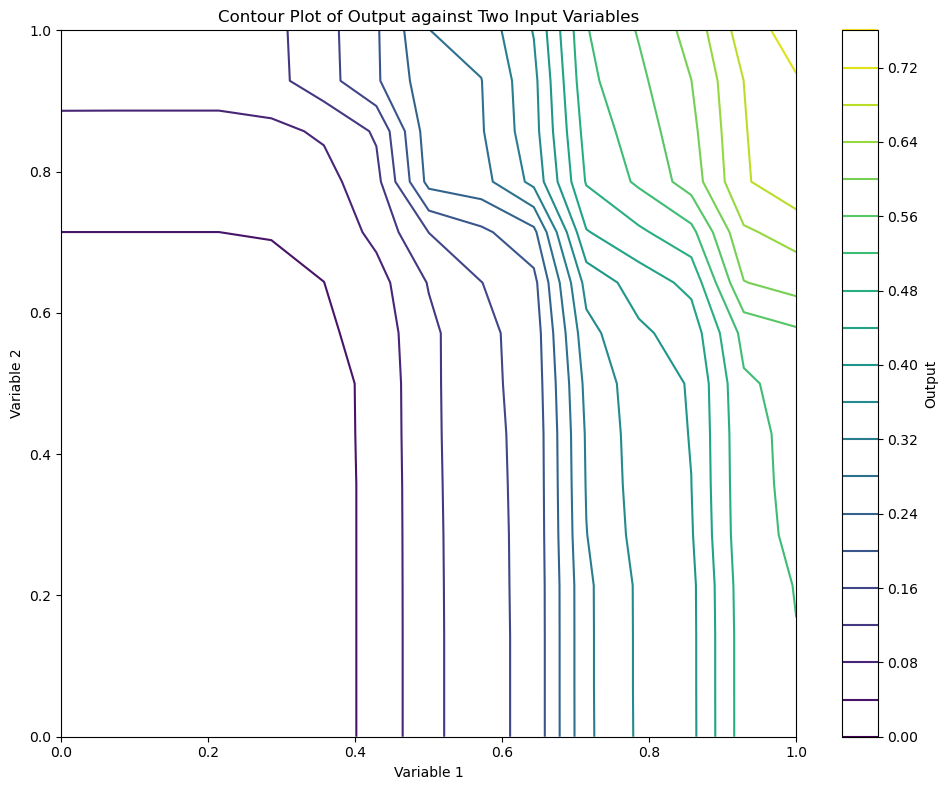

In [35]:
plt.figure(figsize=(10, 8))
contour_plot = plt.contour(x1_mesh, x2_mesh, predictions_mesh, levels=20, cmap='viridis')
plt.colorbar(contour_plot, label='Output')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Contour Plot of Output against Two Input Variables')
plt.tight_layout()
plt.show()